# Проект: классификация

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [69]:
df = pd.read_csv('bank_fin.csv', sep = ';')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [70]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
bank = df.isnull().sum()
nulls = bank[bank > 0]
print('Признаки и количество пропущенных значений:\n{}'.format(nulls))

Признаки и количество пропущенных значений:
balance    25
dtype: int64


In [71]:
df.isna().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

In [72]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
df['job'].unique()




array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [73]:
df.value_counts()


age  job         marital   education  default  balance        housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  deposit
18   student     single    primary    no        608,00 $      no       no    cellular   12   aug    267       1         -1     0         unknown   yes        1
45   management  single    tertiary   no        4 831,00 $    no       no    cellular   30   jul    852       3          182   11        success   yes        1
                 married   tertiary   yes      -577,00 $      yes      yes   cellular   24   jul    204       1         -1     0         unknown   no         1
                           unknown    no        2 724,00 $    no       no    cellular   28   jun    359       2          182   1         success   yes        1
                                                9 051,00 $    yes      no    unknown    19   may    124       63        -1     0         unknown   no         1
                                             

## слово, которым закодированы пропуски (неизвестные значения). - unknown

### Задание 3

In [74]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
def balance2float(x):
    if x is np.NaN:
        return np.NaN
    elif str(x)[0] == '0':
        return 0
    else:
        return int(str(x)[:-6].replace(' ', ''))


df['balance'] = df['balance'].apply(balance2float)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11137 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB



## Задание 2.3

## Вычислите среднее значение по преобразованному в корректный вид признаку balance. Ответ округлите до трёх знаков после точки-разделителя.

In [76]:
df['balance'].mean()

1529.1290293615875

### Задание 4

In [77]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
# ваш код
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку

median_balance = df['balance'].median()
df['balance'].fillna(median_balance, inplace=True)





## Вычислите среднее значение по преобразованному в корректный вид признаку balance. Ответ округлите до трёх знаков после точки-разделителя.

In [78]:
df['balance'].mean()

1526.9360329690019

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11162 non-null  int64  
 1   job        11162 non-null  object 
 2   marital    11162 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  float64
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


### Задание 5

In [80]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
# ваш код
df['job'] = df['job'].replace('unknown', df['job'].mode()[0])
df['education'] = df['education'].replace('unknown', df['education'].mode()[0])
df_new = df[(df['job'] == 'management') & (df['education'] == 'secondary')]


## После замены пропусков рассчитайте средний баланс для клиентов с самой популярной работой и самым популярным уровнем образования (т. е. для тех, у кого одновременно самая популярная работа и самое популярное образование). Ответ округлите до трёх знаков после точки-разделителя..

In [81]:
round(df['balance'].mean(),3)

1526.936

### Задание 6

In [82]:
# удалите все выбросы для признака balance
# ваш код
def drop_iqr(df, col, left=1.5, right=1.5, log_scale=False, add_one=False):
       if log_scale and add_one:
        x = np.log(df[col]+1)
       elif log_scale and not add_one:
        x = np.log(df[col])
       else:
        x = df[col]
    
       quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
       iqr = quartile_3 - quartile_1
       lower_bound = quartile_1 - (iqr*left)
       upper_bound = quartile_3 + (iqr*right)
       outliers = df[(x<lower_bound) | (x>upper_bound)]
       clean_df = df[(x>=lower_bound) & (x<=upper_bound)]
    
       return clean_df, lower_bound, upper_bound, outliers


df, lower_bound, upper_bound, _ = drop_iqr(df, 'balance')
print(lower_bound, upper_bound, df.shape[0])


-2241.0 4063.0 10105


## Часть 2:  Разведывательный анализ

### Задание 1

### Сколько клиентов открыли депозит?

no     5424
yes    4681
Name: deposit, dtype: int64

no     0.536764
yes    0.463236
Name: deposit, dtype: float64

Text(0.5, 1.0, 'Class balance\n')

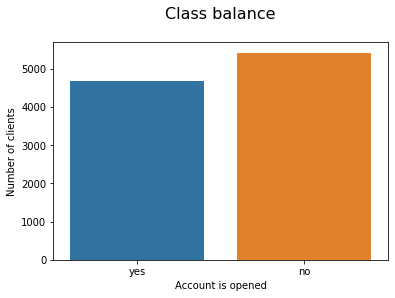

In [83]:
display(df['deposit'].value_counts())
display(df['deposit'].value_counts(normalize=True))

ax = sns.countplot(df['deposit'])
ax.set(xlabel='Account is opened', ylabel='Number of clients')
ax.set_title('Class balance\n',fontsize=16)

## Каков максимальный возраст клиента банка?

In [84]:
df['age'].max()


95

# Какова минимальная продолжительность разговора с клиентом банка? Ответ дайте в количестве секунд..

In [85]:
df["duration"].min()

2

## Сколько было месяцев, в которых проводилась маркетинговая кампания?

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


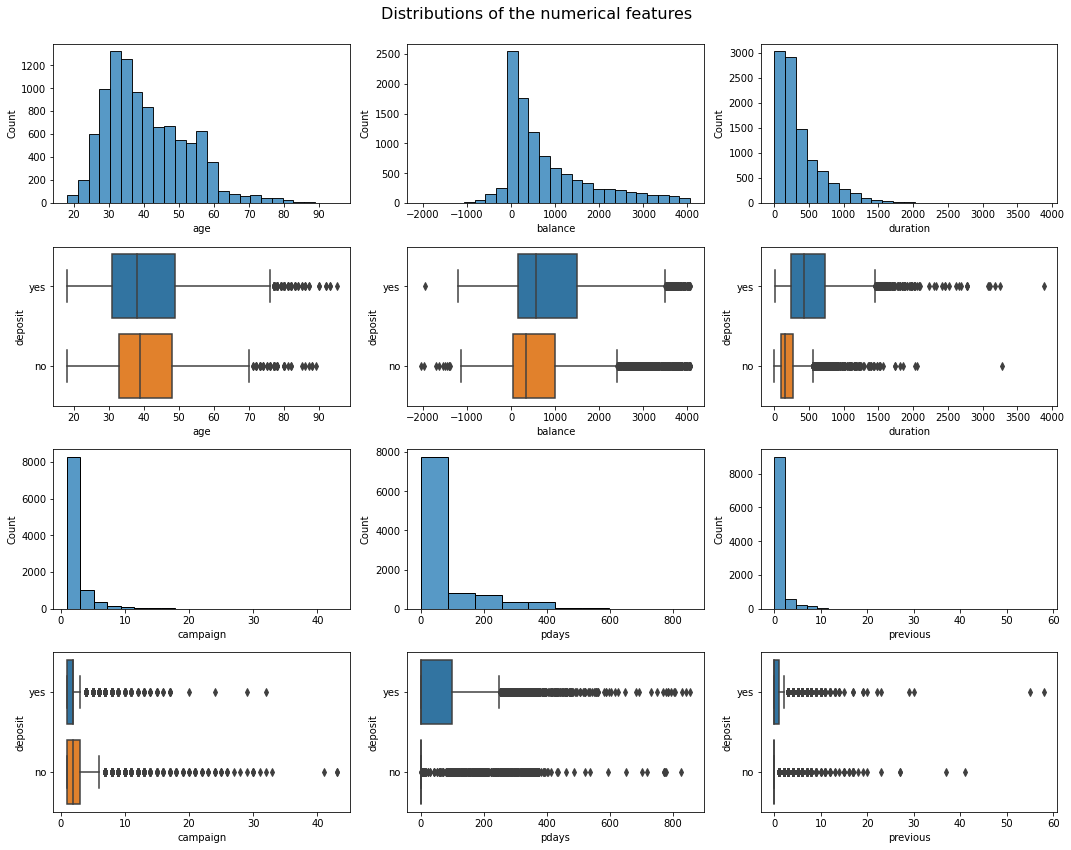

In [86]:
display(df.describe())

fig, ax = plt.subplots(4,3, figsize=(15,12))
sns.histplot(df['age'], bins=25, ax=ax[0,0])       
sns.histplot(df['balance'], bins=25, ax=ax[0,1])  
sns.histplot(df['duration'], bins=25, ax=ax[0,2])  
sns.boxplot(data=df, x='age', y='deposit', ax=ax[1,0]) 
sns.boxplot(data=df, x='balance', y='deposit', ax=ax[1,1])
sns.boxplot(data=df, x='duration', y='deposit', ax=ax[1,2])
sns.histplot(df['campaign'], bins=20, ax=ax[2,0])  
sns.histplot(df['pdays'], bins=10, ax=ax[2,1])     
sns.histplot(df['previous'], bins=25, ax=ax[2,2])  
sns.boxplot(data=df, x='campaign', y='deposit', ax=ax[3,0])
sns.boxplot(data=df, x='pdays', y='deposit', ax=ax[3,1])
sns.boxplot(data=df, x='previous', y='deposit', ax=ax[3,2])
plt.suptitle('Distributions of the numerical features\n', fontsize=16)
plt.tight_layout()

### Задание 2

# Напишите значение статуса предыдущей кампании, для которой в текущей успехов намного больше, чем неудач.

In [87]:
df['poutcome'].value_counts()

unknown    7570
failure    1109
success     945
other       481
Name: poutcome, dtype: int64

In [88]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
# ваш код

### Задания 2 и 3

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


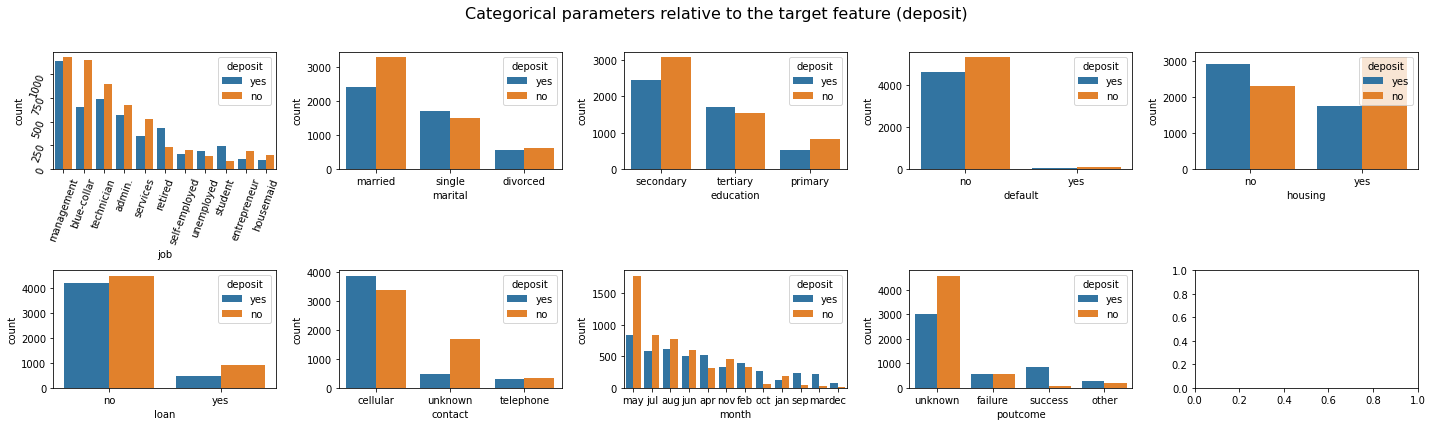

In [89]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
#ваш код

display(df.describe(include='object'))

fig, ax = plt.subplots(2,5, figsize=(20,6))

# Сфера занятости
sns.countplot(
    data=df, x='job', hue='deposit', 
    order=df['job'].value_counts().index, ax=ax[0,0])

# Семейное положение
sns.countplot(
    data=df, x='marital', hue='deposit',
    order=df['marital'].value_counts().index, ax=ax[0,1])

# Уровень образования
sns.countplot(
    data=df, x='education', hue='deposit',
    order=df['education'].value_counts().index, ax=ax[0,2])

# Наличие просроченного кредита
sns.countplot(
    data=df, x='default', hue='deposit',
    order=df['default'].value_counts().index, ax=ax[0,3])

# Наличие ипотеки
sns.countplot(
    data=df, x='housing', hue='deposit',
    order=df['housing'].value_counts().index, ax=ax[0,4])

# Наличие потребительского кредита
sns.countplot(
    data=df, x='loan', hue='deposit',
    order=df['loan'].value_counts().index, ax=ax[1,0])

# Тип контакта с клиентом
sns.countplot(
    data=df, x='contact', hue='deposit', 
    order=df['contact'].value_counts().index, ax=ax[1,1])

# Месяц последнего контакта с клиентом
sns.countplot(
    data=df, x='month', hue='deposit',
    order=df['month'].value_counts().index, ax=ax[1,2])

# Результат предыдущей маркетинговой кампании
sns.countplot(
    data=df, x='poutcome', hue='deposit',
    order=df['poutcome'].value_counts().index, ax=ax[1,3])
ax[0,0].tick_params(labelrotation=70)
plt.suptitle(
    'Categorical parameters relative to the target feature (deposit)\n',
    fontsize=16)
plt.tight_layout()

### Задания 4 и 5

Text(0, 0.5, 'Количество контактов в месяц')

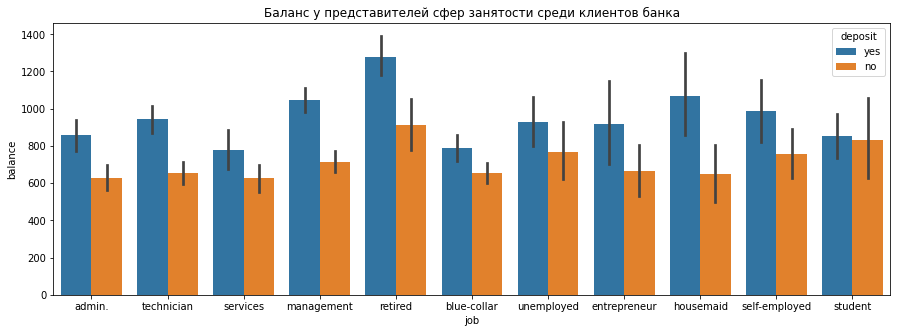

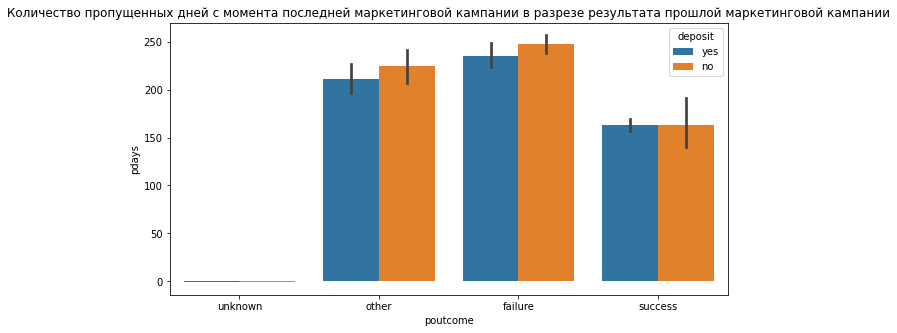

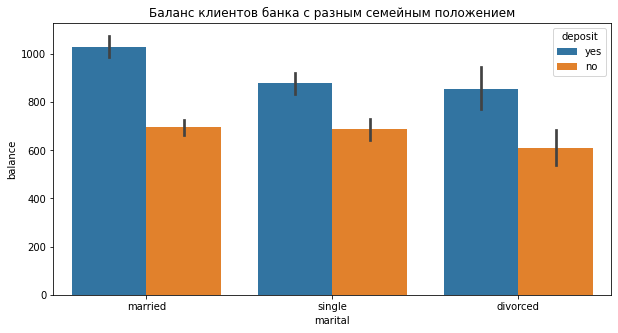

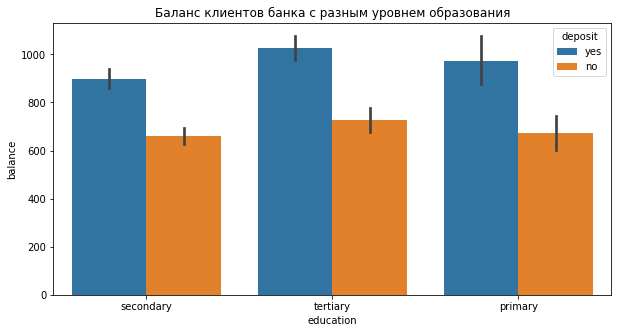

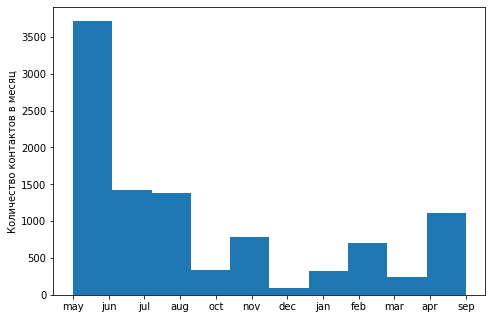

In [90]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
# df.info()
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
df.describe(include = 'object')
#постройте визуализации, иллюстрирующие результаты


# Сколько всего сфер занятости представлено среди клиентов банка? 
fig_1 = plt.figure(figsize=(15, 5))
barplot = sns.barplot(
    data=df,
    x='job',
    y='balance',
    hue='deposit'
)
barplot.set_title('Баланс у представителей сфер занятости среди клиентов банка') 

# В каждый ли месяц проходила маркетинговая кампания?
fig_2_1 = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=df,
    x='poutcome',
    y='pdays',
    hue='deposit'
)
barplot.set_title('Количество пропущенных дней с момента последней маркетинговой кампании в разрезе результата прошлой маркетинговой кампании')

# Какое семейное положение встречается чаще всего? 
fig_3 = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=df,
    x='marital',
    y='balance',
    hue='deposit'
)
barplot.set_title('Баланс клиентов банка с разным семейным положением')

# А образование? 
fig_4 = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=df,
    x='education',
    y='balance',
    hue='deposit'
)
barplot.set_title('Баланс клиентов банка с разным уровнем образования') 

fig = plt.figure() # facecolor='lightgreen'
axes = fig.add_axes([0, 0, 1, 1])
# axes.hist(df.groupby('month')['daily_vaccinations'].sum())
axes.hist(df['month'])
axes.set_ylabel('Количество контактов в месяц')

### Задание 6

In [91]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
# ваш код
df.groupby('poutcome')['deposit'].value_counts().unstack()

deposit,no,yes
poutcome,,
failure,562,547
other,216,265
success,84,861
unknown,4562,3008


### Задание 7

In [92]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
# ваш код
# процент отказов/согласия по месяцам:
(df.groupby('month')['deposit'].value_counts(normalize=True).unstack() \
    * 100).sort_values('no', ascending=False)  

deposit,no,yes
month,,
may,67.863966,32.136034
jan,60.815047,39.184953
jul,58.956276,41.043724
nov,58.461538,41.538462
aug,55.956679,44.043321
jun,54.891304,45.108696
feb,45.557123,54.442877
apr,38.192771,61.807229
oct,18.507463,81.492537


### Задание 8

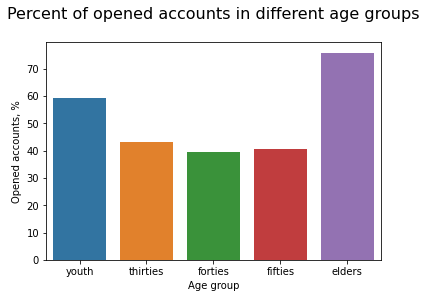

In [93]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения

def age_group(x):
    if x < 30:
        return 'youth'
    elif 30 <= x < 40:
        return 'thirties'
    elif 40 <= x < 50:
        return 'forties'
    elif 50 <= x < 60:
        return 'fifties' 
    else:
        return 'elders'   


df['age_group'] = df['age'].apply(age_group)

piv_tab = (df.groupby('age_group')['deposit'].value_counts(normalize=True) \
    * 100).unstack().reset_index() # процент отказов/согласия по группам
ax = sns.barplot(
    data=piv_tab, x='age_group', y='yes', 
    order=['youth', 'thirties', 'forties', 'fifties', 'elders'])
ax.set(ylabel='Opened accounts, %', xlabel='Age group')
ax.set_title('Percent of opened accounts in different age groups\n', 
             fontsize=16);

### Задания 9 и 10

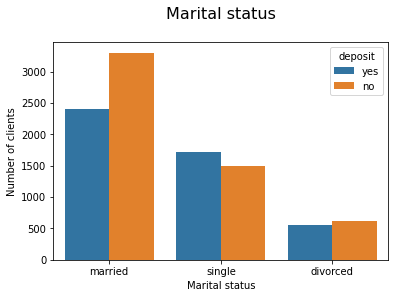

In [94]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
ax = sns.countplot(data=df, x='marital', hue='deposit')
ax.set(xlabel='Marital status', ylabel='Number of clients')
ax.set_title('Marital status\n', fontsize=16);

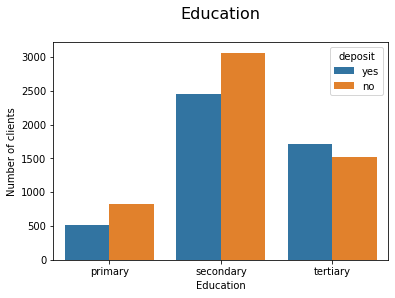

In [95]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
ax = sns.countplot(data=df, x='education', hue='deposit',
              order=['primary', 'secondary', 'tertiary'])
ax.set(xlabel='Education', ylabel='Number of clients')
ax.set_title('Education\n', fontsize=16);

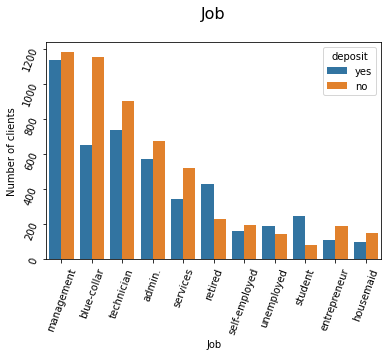

In [96]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
ax= sns.countplot(data=df, x='job', hue='deposit', 
              order=df['job'].value_counts().index)
ax.tick_params(labelrotation=70)
ax.set(xlabel='Job', ylabel='Number of clients')
ax.set_title('Job\n', fontsize=16);

### Задание 11

marital,divorced,married,single
education,,,
primary,96,339,82
secondary,283,1289,879
tertiary,174,784,755


marital,divorced,married,single
education,,,
primary,91,641,100
secondary,370,1830,866
tertiary,163,832,531


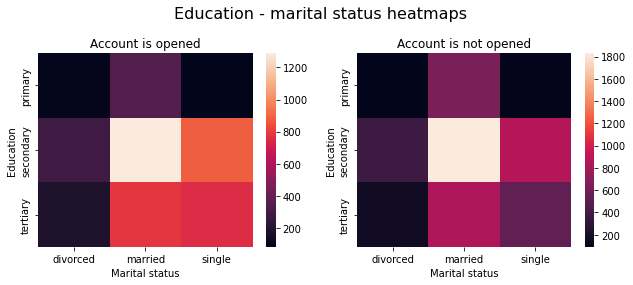

In [97]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
success = df[df['deposit']=='yes']
fail = df[df['deposit']=='no']
success_pivot = success.groupby(
    ['education', 'marital'])['marital'].count().unstack()
## or:
#success_pivot = pd.pivot_table(success,     
#    index='education', columns='marital', values='age', aggfunc='count')  
fail_pivot = fail.groupby(
    ['education', 'marital'])['marital'].count().unstack()

display(success_pivot, fail_pivot)

fig, ax = plt.subplots( 1, 2, figsize=(9,4))
sns.heatmap(success_pivot, ax=ax[0])
sns.heatmap(fail_pivot, ax=ax[1])
ax[0].set_title('Account is opened')
ax[1].set_title('Account is not opened')
ax[0].set(xlabel='Marital status', ylabel='Education')
ax[1].set(xlabel='Marital status', ylabel='Education')
plt.suptitle('Education - marital status heatmaps', fontsize=16)
plt.tight_layout()

## Часть 3: преобразование данных

### Задание 1

In [98]:
# преобразуйте уровни образования
# преобразуйте уровни образования

# Порядковое кодирование
# 0 - primary, 1 - secondary, 2 - tertiary
label_enc = preprocessing.LabelEncoder()
df['education'] = label_enc.fit_transform(df['education'])

# Найдите сумму получившихся значений для признака education.

In [99]:
le = preprocessing.LabelEncoder()
df['education'] = le.fit_transform(df['education'])

In [100]:
df['education'].sum()

11995

In [101]:

def age_group(x):
    if x < 30:
        return 0  # youth
    elif 30 <= x < 40:
        return 1  # thirties
    elif 40 <= x < 50:
        return 2  # forties
    elif 50 <= x < 60:
        return 3  # fifties 
    else:
        return 4  # elders
    

df['age_group'] = df['age'].apply(age_group)

In [102]:
# Перекодируем признак для соответствия ответам на обучающей платформе

df['age_group'] = pd.cut(df.age, [0,30,40,50,60,9999], 
                         labels=['<30', '30-40', '40-50', '50-60', '60+'])
label_enc = preprocessing.LabelEncoder()
df['age_group'] = label_enc.fit_transform(df['age_group'])

### Задания 2 и 3

In [103]:
# преобразуйте бинарные переменные в представление из нулей и единиц
df.replace({'yes': 1, 'no': 0}, inplace=True)


# Вычислите стандартное отклонение по преобразованной в корректный вид целевой переменной deposit. Ответ округлите до трёх знаков после точки-разделителя.

In [104]:
round(df['deposit'].std(),3)

0.499

### Сделаем то же самое для других бинарных переменных, которых у нас три:

### ''default;
### 'housing';
### 'loan'.
### Все три мы будем модифицировать ровно так же: для слова yes мы возьмём в качестве значения 1, а для no — 0.default

In [105]:
round(df['default'].std(),3)

0.127

In [106]:
round(df['housing'].std(),3)

0.5

In [107]:

round(df['loan'].std(),3)

0.345

### Вычислите среднее арифметическое для каждой из получившихся переменных, сложите три результата и в качестве ответа впишите итог, округлив его до трёх знаков после точки-разделителя.

In [108]:
s = df['default'].mean() + df['housing'].mean() + df['loan'].mean()
round(s, 3)

0.635

### Задание 4

In [109]:
# создайте дамми-переменные
dummies = pd.get_dummies(df[[
    'job', 'marital', 'contact', 'month', 'poutcome']])
df = pd.concat([df, dummies], axis=1)

In [110]:
# Удаляем преобразованные признаки типа object

obj_cols = df.select_dtypes('object').columns
df.drop(columns=obj_cols, inplace=True)

### Задания 5 и 6

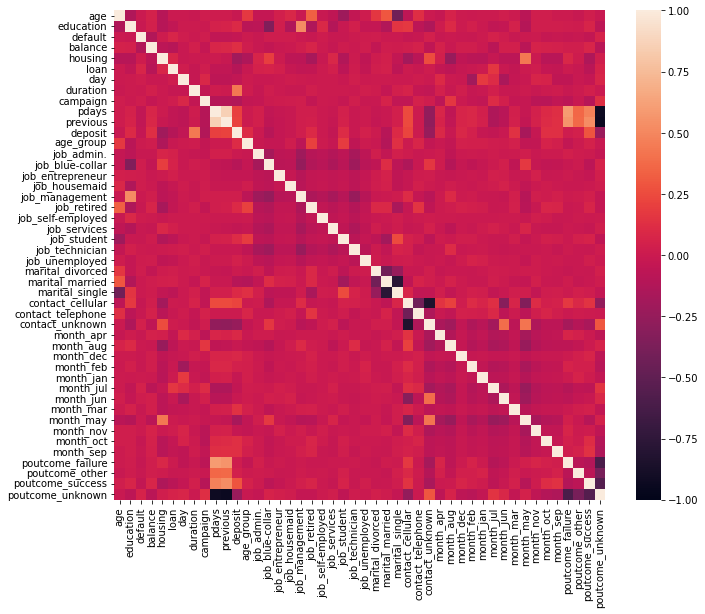

In [111]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
corr_matrix = df.corr(method='kendall')

# Тепловая карта
fig = plt.figure(figsize=(11,9))
sns.heatmap(corr_matrix,  vmin=-1, vmax=1);

In [112]:
# Вычисляем мультиколлинеарные признаки, порог 0.9 
# (порог в соответствии с требованиями задания).
# Использую заготовленную функцию определения мультиколлинеарных признаков

def get_correlated(corr_matrix, thres=0.7):
    """Getting correlated pairs from a correlation matrix 
       with correlation coefficients higher than the threshold

    Args:
        corr_matrix (pandas DataFrame): correlation matrix (e.g., from df.corr())
        thres (float, optional): threshold. Defaults to 0.7 (i.e., coeff > 0.7 or coeff < -0.7).

    Returns:
        pandas Series: correlated pairs and correlation coefficients
    """
    
    correlated_pairs = {}
    
    for col in corr_matrix.columns:
        positive_filter = corr_matrix[col] >= thres
        negative_filter = corr_matrix[col] <= -thres
        match_series = corr_matrix[col][positive_filter | negative_filter]
        for match in match_series.index:
            if match != col and match + ' -- ' + col not in correlated_pairs.keys():
                correlated_pairs.update({col + ' -- ' + match: match_series[match]})
   
    return pd.Series(correlated_pairs).sort_values()


get_correlated(corr_matrix, thres=0.9)

previous -- poutcome_unknown   -0.938271
pdays -- poutcome_unknown      -0.925560
dtype: float64

In [113]:
display(df['poutcome_unknown'].value_counts())
display(df['previous'].value_counts()[:3])
display(df['pdays'].value_counts()[:3])

1    7570
0    2535
Name: poutcome_unknown, dtype: int64

0    7568
1     796
2     612
Name: previous, dtype: int64

-1      7568
 92       88
 182      77
Name: pdays, dtype: int64

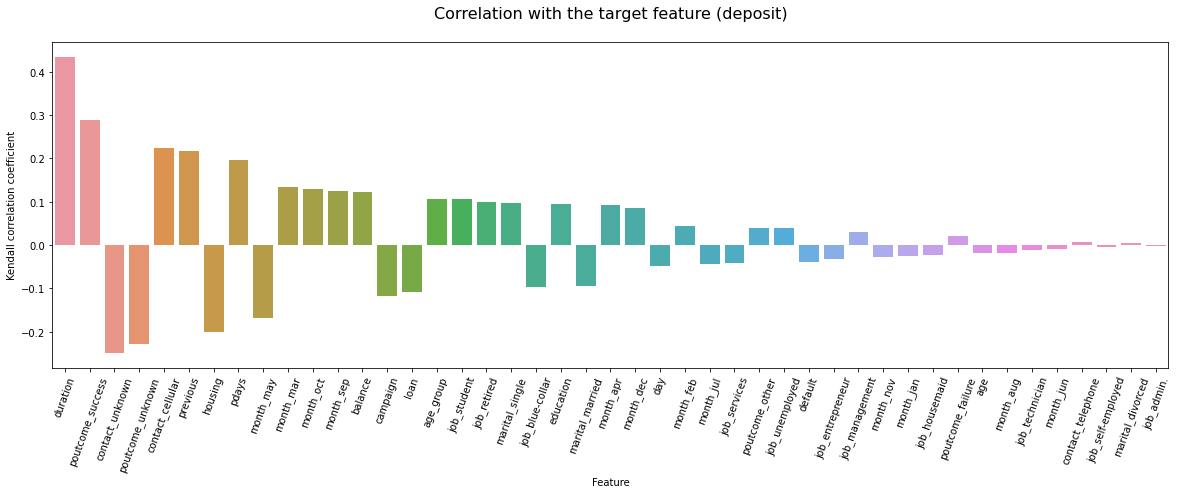

In [114]:
# Корреляция с целевым признаком

fig = plt.figure(figsize=(20,6))
plot_df = corr_matrix.drop('deposit')  # Убираем корреляцию "сам с собой"
feature_order = abs(plot_df['deposit']).sort_values(ascending=False).index
ax = sns.barplot(
    data=plot_df.reset_index(), x='index', y='deposit',
    order = feature_order)
plt.xticks(rotation=70)
ax.set(xlabel='Feature', ylabel='Kendall correlation coefficient')
ax.set_title('Correlation with the target feature (deposit)\n', fontsize=16);

### Задания 7 и 8

In [115]:
X = df.drop(['deposit'], axis=1)
y = df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [116]:
# рассчитайте необходимые показатели
# рассчитайте необходимые показатели

print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')


Размер обучающей выборки: 6770
Размер тестовой выборки: 3335


### Задание 9

In [117]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков

selector = SelectKBest(score_func=f_classif, k=15)
selector.fit(X_train, y_train)
selected_cols = selector.get_feature_names_out()
print(f'Selected features:\n {selected_cols}')
X_train = selector.transform(X_train)
X_test =selector.transform(X_test)

Selected features:
 ['balance' 'housing' 'duration' 'campaign' 'pdays' 'previous' 'age_group'
 'contact_cellular' 'contact_unknown' 'month_mar' 'month_may' 'month_oct'
 'month_sep' 'poutcome_success' 'poutcome_unknown']


### Задание 10

In [118]:
# нормализуйте данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [119]:
# обучите логистическую регрессию и рассчитайте метрики качества
# обучите логистическую регрессию и рассчитайте метрики качества

logregr = linear_model.LogisticRegression(
    random_state=42, solver='sag', max_iter=1000)
logregr.fit(X_train, y_train)
y_train_pred = logregr.predict(X_train)
y_test_pred = logregr.predict(X_test)
print('Обучающая выборка:\n{}'.format(
    metrics.classification_report(y_train, y_train_pred, digits=3)))
print('Тестовая выборка:\n{}'.format(
    metrics.classification_report(y_test, y_test_pred, digits=3)))

Обучающая выборка:
              precision    recall  f1-score   support

           0      0.810     0.878     0.843      3634
           1      0.843     0.761     0.800      3136

    accuracy                          0.824      6770
   macro avg      0.827     0.819     0.821      6770
weighted avg      0.825     0.824     0.823      6770

Тестовая выборка:
              precision    recall  f1-score   support

           0      0.793     0.870     0.830      1790
           1      0.830     0.737     0.781      1545

    accuracy                          0.808      3335
   macro avg      0.812     0.804     0.805      3335
weighted avg      0.810     0.808     0.807      3335



In [120]:
#Создаём объект класса DecisionTreeClassifier
dt_clf_2d = tree.DecisionTreeClassifier(
    criterion='gini', #критерий информативности 
    max_depth=6, #максимальная глубина
    random_state=42 #генератор случайных чисел
)
#Обучаем дерево решений по алгоритму CART
dt_clf_2d.fit(X, y)

DecisionTreeClassifier(max_depth=6, random_state=42)

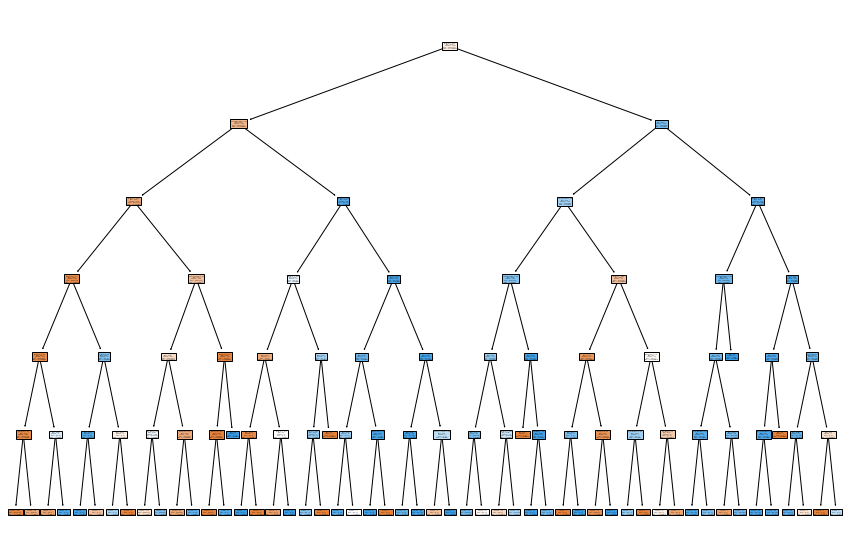

In [121]:
#Создаём фигуру для визуализации графа
fig = plt.figure(figsize=(15, 10))
#Строим граф дерева решений
tree.plot_tree(
    dt_clf_2d, #объект обученного дерева
    feature_names=X.columns, #наименования факторов
    class_names=["0 - Not diabetic", "1 - Diabetic"], #имена классов
    filled=True, #расцветка графа
);

### Задания 2,3,4

In [122]:
# обучите решающие деревья, настройте максимальную глубину
dtree = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
dtree.fit(X_train, y_train)
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)
print('Обучающая выборка:\n{}'.format(
    metrics.classification_report(y_train, y_train_pred, digits=3)))
print('Тестовая выборка:\n{}'.format(
    metrics.classification_report(y_test, y_test_pred, digits=3)))

Обучающая выборка:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3634
           1      1.000     1.000     1.000      3136

    accuracy                          1.000      6770
   macro avg      1.000     1.000     1.000      6770
weighted avg      1.000     1.000     1.000      6770

Тестовая выборка:
              precision    recall  f1-score   support

           0      0.763     0.772     0.767      1790
           1      0.732     0.722     0.727      1545

    accuracy                          0.749      3335
   macro avg      0.747     0.747     0.747      3335
weighted avg      0.749     0.749     0.749      3335



### Задание 5

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
# подберите оптимальные параметры с помощью gridsearch
# подберите оптимальные параметры с помощью gridsearch

# Сетка параметров - по условию задания
estimator = tree.DecisionTreeClassifier(
    criterion='entropy', random_state=42)
param_grid = {'min_samples_split': [2, 5, 7, 10], 'max_depth': [3,5,7]}
gsearch = GridSearchCV(
    estimator=estimator, param_grid=param_grid, scoring='f1')
gsearch.fit(X_train, y_train)

y_train_pred = gsearch.predict(X_train)
y_test_pred = gsearch.predict(X_test)

print(f'Наилучшие значения гиперпараметров: {gsearch.best_params_}')
print('Обучающая выборка:\n{}'.format(
    metrics.classification_report(y_train, y_train_pred, digits=3)))
print('Тестовая выборка:\n{}'.format(
    metrics.classification_report(y_test, y_test_pred, digits=3)))


Наилучшие значения гиперпараметров: {'max_depth': 7, 'min_samples_split': 7}
Обучающая выборка:
              precision    recall  f1-score   support

           0      0.859     0.831     0.845      3634
           1      0.811     0.842     0.827      3136

    accuracy                          0.836      6770
   macro avg      0.835     0.837     0.836      6770
weighted avg      0.837     0.836     0.836      6770

Тестовая выборка:
              precision    recall  f1-score   support

           0      0.839     0.808     0.824      1790
           1      0.787     0.821     0.804      1545

    accuracy                          0.814      3335
   macro avg      0.813     0.815     0.814      3335
weighted avg      0.815     0.814     0.814      3335



# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [125]:
# обучите на ваших данных случайный лес
# Параметры модели - по условию задания
rf = ensemble.RandomForestClassifier(
    n_estimators=100, criterion='gini', min_samples_leaf=5, 
    max_depth=10, random_state=42)
rf.fit(X_train, y_train)

y_test_pred = rf.predict(X_test)
print('Тестовая выборка:\n{}'.format(
    metrics.classification_report(y_test, y_test_pred, digits=3)))

Тестовая выборка:
              precision    recall  f1-score   support

           0      0.851     0.821     0.836      1790
           1      0.801     0.833     0.817      1545

    accuracy                          0.827      3335
   macro avg      0.826     0.827     0.826      3335
weighted avg      0.828     0.827     0.827      3335



### Задания 2 и 3

In [126]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
gboost = ensemble.GradientBoostingClassifier(
    learning_rate=0.05, n_estimators=300, min_samples_leaf=5,
    max_depth=5, random_state=42)
gboost.fit(X_train, y_train)

y_test_pred = gboost.predict(X_test)
print('Тестовая выборка:\n{}'.format(
    metrics.classification_report(y_test, y_test_pred, digits=3)))

Тестовая выборка:
              precision    recall  f1-score   support

           0      0.850     0.822     0.836      1790
           1      0.801     0.832     0.816      1545

    accuracy                          0.826      3335
   macro avg      0.825     0.827     0.826      3335
weighted avg      0.827     0.826     0.827      3335



### Задание 4

In [127]:
# объедините уже известные вам алгоритмы с помощью стекинга 

dtree = tree.DecisionTreeClassifier(
    criterion='entropy', max_depth=7, min_samples_split=7, random_state=42)
logregr = linear_model.LogisticRegression(
    solver='sag', max_iter=1000, random_state=42)
gboost = ensemble.GradientBoostingClassifier(
    learning_rate=0.05, n_estimators=300, min_samples_leaf=5, 
    max_depth=5, random_state=42)

estimators = [
    ('dtree', dtree), ('logregr', logregr), ('gboost', gboost)]

stacked = ensemble.StackingClassifier(estimators=estimators)
stacked.fit(X_train, y_train)

y_test_pred = stacked.predict(X_test)
print('Тестовая выборка:\n{}'.format(
    metrics.classification_report(y_test, y_test_pred, digits=3)))

Тестовая выборка:
              precision    recall  f1-score   support

           0      0.836     0.835     0.835      1790
           1      0.809     0.810     0.810      1545

    accuracy                          0.823      3335
   macro avg      0.822     0.822     0.822      3335
weighted avg      0.823     0.823     0.823      3335



### Задание 5

<AxesSubplot: >

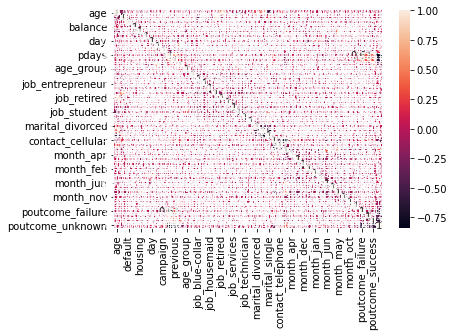

In [128]:
corr_matrix = df.corr()

sns.heatmap(corr_matrix, annot=True)

In [129]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
gboost = ensemble.GradientBoostingClassifier(
    learning_rate=0.05, n_estimators=300, min_samples_leaf=5, 
    max_depth=5, random_state=42)
gboost.fit(X_train, y_train)
sorted(list(zip(selected_cols, gboost.feature_importances_)), 
       key=lambda x: x[1], reverse=True)

[('duration', 0.5071058721451659),
 ('poutcome_success', 0.11495825455712295),
 ('contact_unknown', 0.07258212753674755),
 ('balance', 0.05795212468091972),
 ('pdays', 0.05508257844117282),
 ('housing', 0.047725379385995796),
 ('age_group', 0.03990225428089568),
 ('month_mar', 0.027818612298223928),
 ('month_oct', 0.019880155415052104),
 ('month_may', 0.01524455070689359),
 ('campaign', 0.014776926675192212),
 ('month_sep', 0.013529992756931104),
 ('previous', 0.008438741473457433),
 ('contact_cellular', 0.003620125904267944),
 ('poutcome_unknown', 0.001382303741961252)]

### Задания 6,7,8

In [130]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
import optuna

def optuna_rf(trial):
  # задаем пространства поиска гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
    max_depth = trial.suggest_int('max_depth', 10, 30, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  # создаем модель
    model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  # обучаем модель
    model.fit(X_train, y_train)
    score = metrics.f1_score(y_train, model.predict(X_train))

    return score


In [131]:
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-02-07 21:01:17,122] A new study created in memory with name: RandomForestClassifier
[I 2023-02-07 21:01:17,561] Trial 0 finished with value: 0.8465291988037148 and parameters: {'n_estimators': 111, 'max_depth': 10, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.8465291988037148.
[I 2023-02-07 21:01:18,348] Trial 1 finished with value: 0.8807511737089201 and parameters: {'n_estimators': 154, 'max_depth': 24, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8807511737089201.
[I 2023-02-07 21:01:19,152] Trial 2 finished with value: 0.8536166224027496 and parameters: {'n_estimators': 168, 'max_depth': 20, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.8807511737089201.
[I 2023-02-07 21:01:19,754] Trial 3 finished with value: 0.8707610564150648 and parameters: {'n_estimators': 123, 'max_depth': 15, 'min_samples_leaf': 4}. Best is trial 1 with value: 0.8807511737089201.
[I 2023-02-07 21:01:20,515] Trial 4 finished with value: 0.9255653266331658 and parameters: {'n_

In [132]:
# рассчитаем точность для тестовой выборки
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42)
model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
print("accuracy на тестовом наборе: {:.2f}".format(model.score(X_test, y_test)))
y_test_pred = model.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

accuracy на тестовом наборе: 0.83
f1_score на тестовом наборе: 0.82
